Baca Dataset

In [38]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('../Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Praproses Data

In [40]:
df1 = (df[['season', 'yr', 'holiday', 'weekday', 'workingday',
           'weathersit', 'atemp', 'hum', 'windspeed']]
       .rename(columns={
           'season': 'musim',
           'yr': 'tahun',
           'holiday': 'libur',
           'weekday': 'hari_dlm_minggu',
           'workingday': 'hari_kerja',
           'weathersit': 'cuaca',
           'atemp': 'suhu_terasa',
           'hum': 'kelembaban',
           'windspeed': 'kecep_angin'
       })
       .copy())


df1.head()

,musim,tahun,libur,hari_dlm_minggu,hari_kerja,cuaca,suhu_terasa,kelembaban,kecep_angin
0,1,0,0,6,0,2,0.363625,0.805833,0.160446
1,1,0,0,0,0,2,0.353739,0.696087,0.248539
2,1,0,0,1,1,1,0.189405,0.437273,0.248309
3,1,0,0,2,1,1,0.212122,0.590435,0.160296
4,1,0,0,3,1,1,0.229270,0.436957,0.186900


In [41]:
#Analisis Korelasi

## Hitung Matriks Korelasi
corr_matrix = df1.corr()

print(corr_matrix)

                    musim     tahun     libur  hari_dlm_minggu  hari_kerja  \
musim            1.000000 -0.001844 -0.010537        -0.003080    0.012485   
tahun           -0.001844  1.000000  0.007954        -0.005461   -0.002013   
libur           -0.010537  0.007954  1.000000        -0.101960   -0.253023   
hari_dlm_minggu -0.003080 -0.005461 -0.101960         1.000000    0.035790   
hari_kerja       0.012485 -0.002013 -0.253023         0.035790    1.000000   
cuaca            0.019211 -0.048727 -0.034627         0.031087    0.061200   
suhu_terasa      0.342876  0.046106 -0.032507        -0.007537    0.052182   
kelembaban       0.205445 -0.110651 -0.015937        -0.052232    0.024327   
kecep_angin     -0.229046 -0.011817  0.006292         0.014282   -0.018796   

                    cuaca  suhu_terasa  kelembaban  kecep_angin  
musim            0.019211     0.342876    0.205445    -0.229046  
tahun           -0.048727     0.046106   -0.110651    -0.011817  
libur           -0.03

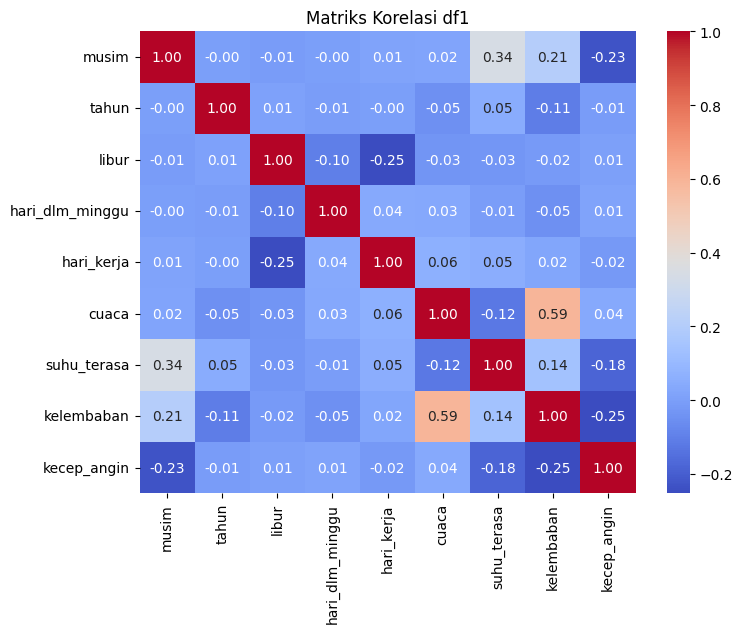

In [42]:
# Buat Heatmap Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi df1')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah 'cnt' (jumlah peminjaman)
# dan fitur (X) adalah semua kolom lainnya kecuali 'cnt'
y = df['cnt']
X = df1[['musim', 'tahun', 'bulan', 'libur', 'hari_dlm_minggu',
        'hari_kerja', 'cuaca', 'suhu', 'suhu_terasa', 'kelembaban', 'kecep_angin']]

# Bagi data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state untuk hasil yang konsisten

# Cetak
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

# Cek apakah sudah ada konstanta pada data training 
X_train.head()

Jumlah data training: 584
Jumlah data testing: 147


,musim,tahun,bulan,libur,hari_dlm_minggu,hari_kerja,cuaca,suhu,suhu_terasa,kelembaban,kecep_angin
682,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


In [24]:
# Tambahkan Konstanta
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,musim,tahun,bulan,libur,hari_dlm_minggu,hari_kerja,cuaca,suhu,suhu_terasa,kelembaban,kecep_angin
682,1.0,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046
250,1.0,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748
336,1.0,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783
260,1.0,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483
543,1.0,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775


In [ ]:

# Buat Model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('--------------------------------')
print(model.params)
print('--------------------------------')
const = model.params['const']
x1 = model.params['suhu']
x2 = model.params['kelembaban']
x3 = model.params['kecep_angin']
x4 = model.params['cuaca']
x5 = model.params['musim']
x6 = model.params['tahun']
x7 = model.params['bulan']
x8 = model.params['libur']
x9 = model.params['hari_dlm_minggu']
x10 = model.params['hari_kerja']
# print persamaan regresi
print(f'Persamaan Regresi: Y = {const:.3f} + {x1:.3f}*x1 + {x2:.3f}*x2 + {x3:.3f}*x3 + {x4:.3f}*x4 + {x5:.3f}*musim + {x6:.2f}*x6 + {x7:.3f}*x7 + {x8:.3f}*x8 + {x9:.3f}*x9 + {x10:.3f}*x10')
print('--------------------------------')

--------------------------------
const              1248.320928
musim               524.722536
tahun              2023.997547
bulan               -38.444658
libur              -391.550766
hari_dlm_minggu      72.937003
hari_kerja          160.804892
cuaca              -632.856284
suhu               2097.247836
suhu_terasa        3488.042179
kelembaban         -865.439419
kecep_angin       -2080.540395
dtype: float64
--------------------------------
Persamaan Regresi: Y = 1248.321 + 2097.248*x1 + -865.439*x2 + -2080.540*x3 + -632.856*x4 + 524.723*musim + 2024.00*x6 + -38.445*x7 + -391.551*x8 + 72.937*x9 + 160.805*x10
--------------------------------


In [34]:
# Cetak informasi model OLS
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          2.56e-186
Time:                        14:11:36   Log-Likelihood:                -4784.9
No. Observations:                 584   AIC:                             9594.
Df Residuals:                     572   BIC:                             9646.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1248.3209    272.690     

In [37]:
import numpy as np
import statsmodels.api as sm
# pengujian model dengan data testing
X_test_const = sm.add_constant(X_test)

# prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat Tabel hasil prediksi
hasil = pd.DataFrame({
    "Suhu (C)": X_test['suhu'],
    "Kelembaban (%)": X_test['kelembaban'],
    "Kecepatan Angin (m/s)": X_test['kecep_angin'],
    "Cuaca": X_test['cuaca'],
    "Musim": X_test['musim'],
    "Tahun": X_test['tahun'],
    "Bulan": X_test['bulan'],
    "Libur": X_test['libur'],
    "Hari dalam Minggu": X_test['hari_dlm_minggu'],
    "Hari Kerja": X_test['hari_kerja'],
    "Jumlah Peminjaman Aktual": y_test,
    "Jumlah Peminjaman Prediksi": y_pred_test
})

# 1) Selisih error(positif = overpredict)
hasil["Selisih Error (peminjaman)"] = hasil["Jumlah Peminjaman Prediksi"] - hasil["Jumlah Peminjaman Aktual"]

# 2) Akurasi per baris(100 * (1 - | error | / aktual)), dibatasi 0-100%
# ganti 0 dengan NaN untuk menghindari pembagian dengan nol
denom = np.where(hasil["Jumlah Peminjaman Aktual"] == 0, np.nan, hasil["Jumlah Peminjaman Aktual"])
hasil["Akurasi (%)"] = (1 - (np.abs(hasil["Selisih Error (peminjaman)"]) / denom)) * 100

hasil.head()

,Suhu (C),Kelembaban (%),Kecepatan Angin (m/s),Cuaca,Musim,Tahun,Bulan,Libur,Hari dalam Minggu,Hari Kerja,Jumlah Peminjaman Aktual,Jumlah Peminjaman Prediksi,Selisih Error (peminjaman),Akurasi (%)
703,0.475833,0.733750,0.174129,1,4,1,12,0,2,1,6606,6220.416612,-385.583388,94.163134
33,0.186957,0.437826,0.277752,1,1,0,2,0,4,1,1550,1571.605763,21.605763,98.606080
300,0.330833,0.585833,0.229479,2,4,0,10,0,5,1,3747,3043.967028,-703.032972,81.237444
456,0.425833,0.676250,0.172267,2,2,1,4,0,0,0,6041,4307.202484,-1733.797516,71.299495
633,0.550000,0.570000,0.236321,1,4,1,9,0,2,1,7538,6765.659072,-772.340928,89.754034
